# Modélisation de l'évolution de notre univers

### Jehanne Delhomelle, Léo Vacher, 2023

On cherche à tracer l'évolution du facteur d'échelle 𝛼(𝑡)
en fonction du temps, défini par le paramètre de Hubble $H=\frac{\dot a}{a}$  qui quantifie l'évolution de l'Univers. Des équations de Friedmann Lemaître, on a déduit : 
$H=\frac{\dot a}{a}=H_0\sqrt{\Omega_r^0 a^{-4}+\Omega_m^0 a^{-3}+\Omega_k^0 a^{-2}+\Omega_r^0}$ (1)

Importons tout d'abord les bibliothèques utiles

In [15]:
import numpy as np
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import math

Il convient alors de déterminer quelques paramètres :

In [42]:
H0= 1/13.97  #H0 in Gyr^-1
a0=1e-9 #valeur de a au début de l'univers
t0=1e-7
tmax=186
nbpoints=100000
tps=np.linspace(0,186,nbpoints)

On crée la fonction find_nearest qui nous permettra de regarder quand $a$ est le plus proche de 1 (sa valeur actuelle)

In [43]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

On crée ensuite une fonction qui contient l'équation (1) :

In [44]:
def f(a,tps):
    return np.sqrt(omega_r*a**(-4)+omega_m*a**(-3)+omega_k*a**(-2)+omega_l)*H0*a

Puis une fonction qui va tracer l'évolution du facteur d'échelle en fonction des paramètres en entrée :

In [45]:
def evol(omega_r,omega_m,omega_l,omega_k):
    sol=odeint(f,a0,tps)
    plt.xlabel('Time from now in Gyr')
    plt.ylabel('Relative size of the Universe')
    plt.xlim([-20,20])
    plt.ylim([0,2])
    plt.plot(tps-tps[find_nearest(sol, 1)],sol,label='$\Omega_r$= {0:.4g} $\Omega_m$={1:.2g}  $\Omega_\Lambda$={2:.2g}  $\Omega_k$={3:.2g}'.format(omega_r,omega_m,omega_l,omega_k),color=col)
    plt.legend(loc='upper left',fontsize='small')

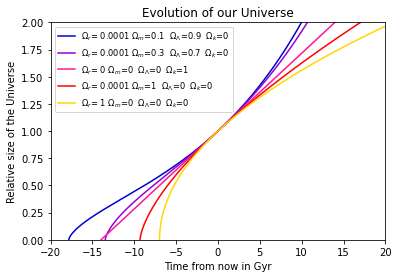

In [46]:
#Test
omega_r=10**(-4)
omega_m=0.1
omega_l=0.9
omega_k=0
col='mediumblue'
evol(omega_r,omega_m,omega_l,omega_k)

#Lambda-CDM
omega_r=10**(-4)
omega_m=0.3
omega_l=0.7
omega_k=0
col='darkviolet'
evol(omega_r,omega_m,omega_l,omega_k)

#Empty Universe
omega_r=0
omega_m=0
omega_l=0
omega_k=1
col='deeppink'
evol(omega_r,omega_m,omega_l,omega_k)

#Einstein-de-Sitter
omega_r=10**(-4)
omega_m=1
omega_l=0
omega_k=0
col='red'
evol(omega_r,omega_m,omega_l,omega_k)

#Radiation dominated
omega_r=1
omega_m=0
omega_l=0
omega_k=0
col='gold'
evol(omega_r,omega_m,omega_l,omega_k)


plt.title('Evolution of our Universe')
plt.savefig("EvolUniv.png")

## Comparaison avec les solutions analytiques connues

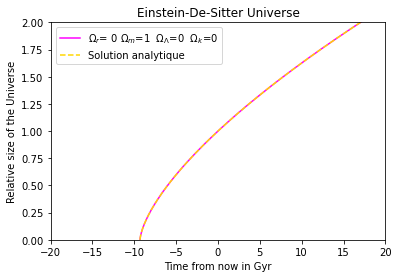

In [47]:
#Evolution pour matière seule : Einstein-De-Sitter Universe

omega_r=0 
omega_m=1
omega_l=0
omega_k=0 
col='magenta'
evol(omega_r,omega_m,omega_l,omega_k)

#Comparons à la solution analytique : 
t=np.linspace(t0,tmax,nbpoints)
a=((3*np.sqrt(omega_m)*t*H0)/2)**(2/3)
plt.plot(t-t[find_nearest(a, 1)],a,label='Solution analytique',color='gold',linestyle='--')
plt.legend()

plt.title('Einstein-De-Sitter Universe')
plt.savefig("EdS")

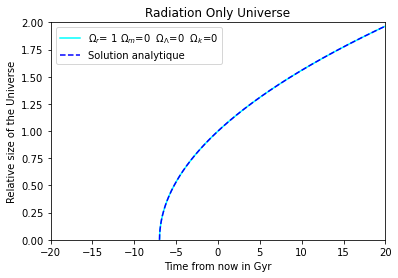

In [48]:
#Evolution pour rayonnement seul
omega_r=1
omega_m=0
omega_l=0 
omega_k=0 
col='aqua'
evol(omega_r,omega_m,omega_l,omega_k)

#Comparons à la solution analytique : 
t=np.linspace(t0,tmax,nbpoints)
a=((4*H0*t*np.sqrt(omega_r))/2)**(1/2)
plt.plot(t-t[find_nearest(a, 1)],a,label='Solution analytique',color='blue',linestyle='--')
plt.legend()
plt.title('Radiation Only Universe')
plt.savefig("RadOnly.png")

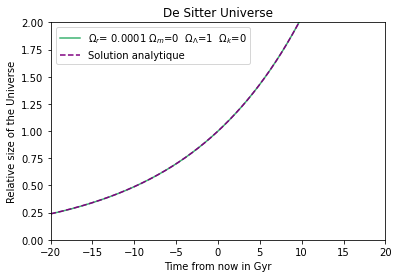

In [49]:
#De Sitter Model (Only Dark Energy)
omega_r=10**(-4)
omega_m=0 
omega_l=1 
omega_k=0
col='mediumseagreen'
evol(omega_r,omega_m,omega_l,omega_k)

#Comparons à la solution analytique : 
t=np.linspace(-tmax,tmax,nbpoints)
a=np.exp(H0*t*np.sqrt(omega_l))
plt.plot(t,a,label='Solution analytique',color='purple',linestyle='--')
plt.legend()
plt.title('De Sitter Universe')
plt.savefig("DeS.png")

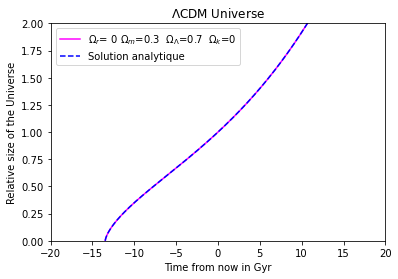

In [50]:
#Solution analytique pour matière et lambda : Lambda-CDM Model
omega_r=0 
omega_m=0.3
omega_l=0.7
omega_k=0 
col='magenta'
evol(omega_r,omega_m,omega_l,omega_k)

#Comparons à la solution analytique : 
t=np.linspace(t0,tmax,nbpoints)
a=((omega_m/omega_l)**(1/3)*(np.sinh((3/2)*t*H0*np.sqrt(omega_l)))**(2/3))
plt.plot(t-t[find_nearest(a, 1)],a,label='Solution analytique',color='blue', linestyle='--')
plt.legend()

plt.title('$\Lambda$CDM Universe')
plt.savefig("lcdm.png")

# Modèle hyperbolique : effondrement

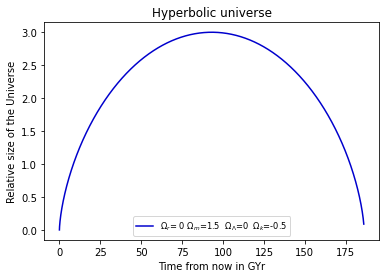

In [51]:
def H(a):
    return H0 * np.sqrt(omega_r * a**(-4) + omega_m * a**(-3) + omega_k*a**(-2) + omega_l)

def f(a, tps, t_amax):
    da = H(a) * a
    if tps >= t_amax:
        da *= -1
    return da

def evol(omega_r,omega_m,omega_l,omega_k):
    
    if omega_k < 0 and omega_l == 0:
        a_max = -omega_m / omega_k
        t_amax = quad(lambda x: 1/(x * H(x)), 0, a_max)[0]
    else :
        t_amax = 10**1000


    sol = odeint(f, a0, tps, args=(t_amax,))
    plt.xlabel('Time from now in GYr')
    plt.ylabel('Relative size of the Universe')
    plt.plot(tps,sol,label='$\Omega_r$= {0:.4g} $\Omega_m$={1:.2g}  $\Omega_\Lambda$={2:.2g}  $\Omega_k$={3:.2g}'.format(omega_r,omega_m,omega_l,omega_k),
    color=col)
    plt.legend(loc='upper left',fontsize='small')

omega_r=0
omega_m=1.5
omega_l=0
omega_k=1 - omega_m - omega_r - omega_l
col='mediumblue'
evol(omega_r,omega_m,omega_l,omega_k)
plt.legend(loc='lower center',fontsize='small')
plt.title('Hyperbolic universe')
plt.savefig("hyperbolic.png")

## Plot complet

C:\Users\jehan\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


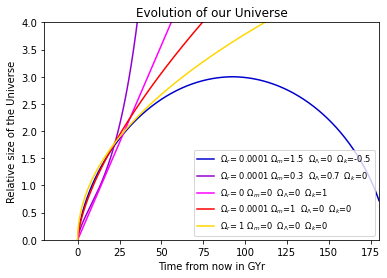

In [52]:


#Hyperbolic
omega_r=10**(-4)
omega_m=1.5
omega_l=0
omega_k=1 - omega_m - omega_r - omega_l
col='mediumblue'
evol(omega_r,omega_m,omega_l,omega_k)

#Lambda-CDM
omega_r=10**(-4)
omega_m=0.3
omega_l=0.7
omega_k=0
col='darkviolet'
evol(omega_r,omega_m,omega_l,omega_k)

#Empty Universe
omega_r=0
omega_m=0
omega_l=0
omega_k=1
col='magenta'
evol(omega_r,omega_m,omega_l,omega_k)

#Einstein-de-Sitter
omega_r=10**(-4)
omega_m=1
omega_l=0
omega_k=0
col='red'
evol(omega_r,omega_m,omega_l,omega_k)

#Radiation dominated
omega_r=1
omega_m=0
omega_l=0
omega_k=0
col='gold'
evol(omega_r,omega_m,omega_l,omega_k)

plt.xlim([-20,180])
plt.ylim([0,4])
plt.legend(loc='lower right',fontsize='small')
       
plt.title('Evolution of our Universe')
plt.savefig("complete.png")